# Adventures of Adventure Works
##### Roman, Noor And Brian aka Dragons
![](title.png)


# Table-of-contents
[Introduction](#Introduction)
<br>
[Data Exploration](#data_exploration)
<br>
[Machine Learning](#ml)
- [Machine Learning - Classification](#classification)
<br>
- [Machine Learning - Regression](#regression)

[Conclusions and Recommendations](#conclusions)




# Introduction
<hr>
In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike.

In this project, you must tackle four challenges:

- Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
- Build a classification model to predict customer purchasing behavior.
- Build a regression model to predict customer purchasing behavior.
- Provide recomnendations for help in future sales.

[Back to TOC](#Table-of-contents)
<a id='data_exploration'></a>
# Data Exploration
<hr>
## Creating the Dataset
The 3 files were read and merged to create the bike shop dataset.

In [52]:
df_ave = pd.read_csv("AW_AveMonthSpend.csv", sep=",", encoding='latin-1')
df_buyer = pd.read_csv("AW_BikeBuyer.csv", sep=",", encoding='latin-1')
df_customer = pd.read_csv("AW_Customers.csv", sep=",", encoding='latin-1')

df_ave = df_ave.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_buyer = df_buyer.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_customer = df_customer.rename(index=str, columns={"?CustomerID": "CustomerID"})

In [58]:
df_ave.head(3)

,CustomerID,AveMonthSpend
0,11000,87
1,11001,127
2,11002,123


In [59]:
df_buyer.head(3)

,CustomerID,BikeBuyer
0,11000,1
1,11001,1
2,11002,1


In [60]:
df_customer.head(3)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,139848
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,106696
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,101237


### Cleaning the dataset

- Some columns in the dataset (Title, Middle, Suffux, AddressLine2) contains empty fields, thus they were first candidates to be removed from predictors list. 


- Similarly, some other columns such as First Name, Last Name, phone number, AddressLine1 would not provide any additional information about customers.


- We expected that postal code, state and province would not have any impact on accuracy of the training model (other than possibly overfitting it)
    - Just to be sure, we evaluated our assumpion by means of regularization, which appeared to be accurate.

In [54]:
pd.isnull(df_customer).sum() > 0

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

### Dropping Duplicates
There were a few duplicates in the dataset. Following is a count before and after dropping the duplicates

In [56]:
print_df_before_and_after_removing_duplicates(df_ave, df_buyer, df_customer)

Shape Before duplicatate removing - AveMonthSpend: (18459, 2) 
shape of Customer: (18459, 23) 
shape of BikeBuyer: (18459, 2)
Shape AFTER duplicatate removing - AveMonthSpend:  (18459, 2) 
shape of Customer: (18459, 23) 
shape of BikeBuyer: (18335, 2)


In [35]:
merged_df_cleaned.head(3)

,CustomerID,AveMonthSpend,BikeBuyer,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,87,1,Rockhampton,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,139848
1,11001,127,1,Seaford,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,106696
2,11002,123,1,Hobart,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,101237


### Adding Age
The study was done in 1998 so age was caclulated as a difference from 1998 to the birth date and added to the dataset.


In [37]:
prediction_df = get_prediction_df(merged_df_cleaned)
prediction_df.head()

,Age,AveMonthSpend,BikeBuyer,CustomerID,Education,Gender,HomeOwnerFlag,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,Occupation,TotalChildren,YearlyIncome
0,31,87,1,11000,Bachelors,M,1,M,0,0,Professional,2,139848
1,32,127,1,11001,Bachelors,M,0,S,1,3,Professional,3,106696
2,32,123,1,11002,Bachelors,M,1,M,1,3,Professional,3,101237
3,29,50,1,11003,Bachelors,F,0,S,1,0,Professional,0,88848
4,29,99,1,11004,Bachelors,F,1,S,4,5,Professional,5,122653


In [38]:
prediction_df.describe()

,Age,AveMonthSpend,BikeBuyer,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,18435.000000,18435.000000,18435.000000,18435.000000,18435.000000,18435.000000,18435.000000,18435.000000,18435.000000
mean,35.418335,72.623162,0.333062,20237.511852,0.676214,1.502794,1.005099,2.009276,78302.643504
std,11.239258,27.294868,0.471321,5337.091000,0.467932,1.136563,1.522097,1.683827,39710.857374
min,17.000000,20.000000,0.000000,11000.000000,0.000000,0.000000,0.000000,0.000000,8217.000000
25%,27.000000,52.000000,0.000000,15607.500000,0.000000,1.000000,0.000000,0.000000,48070.500000
50%,34.000000,68.000000,0.000000,20231.000000,1.000000,2.000000,0.000000,2.000000,76434.000000
75%,43.000000,84.000000,1.000000,24869.500000,1.000000,2.000000,2.000000,3.000000,105258.000000
max,87.000000,174.000000,1.000000,29483.000000,1.000000,4.000000,5.000000,5.000000,201090.000000


## Analyzing the Dataset

#### Numerical Data
Let us start with some histograms to look at the shape of our numerical data.
- The yearly income data is somewaht mulinomial with a slight right skew
- Age data is right skewed 
- Ave monthly spending data is also multinomial with a right skew

To get these data in proper shape, some transformation would be required.

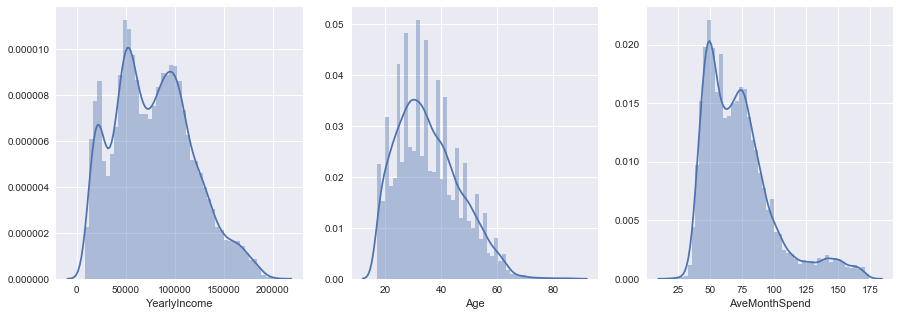

In [39]:
explore_numerical_data(prediction_df)

#### Categorical Data

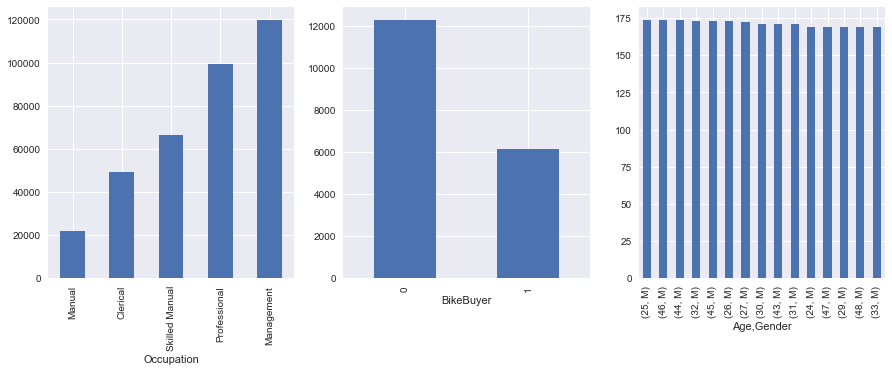

In [40]:
fig = plt.figure(figsize = (15,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

prediction_df.groupby('Occupation')['YearlyIncome'].apply(np.median).sort_values(ascending = True).plot(kind='bar', ax = ax0)
prediction_df.groupby('BikeBuyer').size().plot(kind='bar', ax = ax1)
prediction_df.groupby(['Age', 'Gender'])['AveMonthSpend'].max().sort_values(ascending=False).head(15).plot(kind='bar')

fig.savefig('plot1.png')

#### Relationships
We can also look at some different relationships that might come in handy for targeted advertisement: 

- Male customers are more likely to buy bikes than female customers
- Single customers are more likely to buy bikes than married customers

Taking it a a little bit further:

- Married single customers buy the most and married female customers the least
- and of course, more children need more bikes

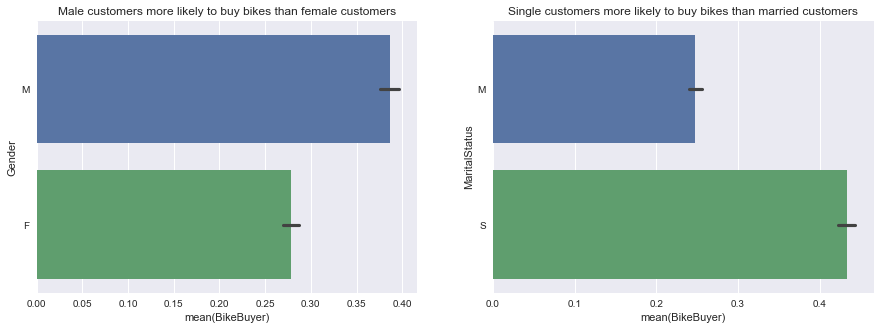

In [41]:
explore_categorical_relationships(prediction_df)

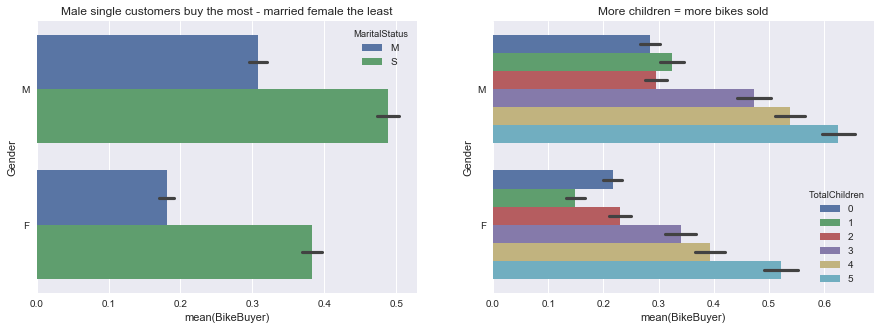

In [42]:
explore_more_categorical_relationships(prediction_df)

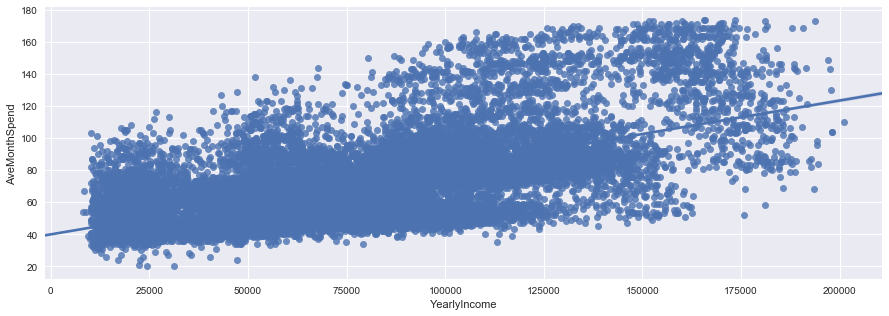

In [43]:
explore_relationships(prediction_df)

[Back to TOC](#Table-of-contents)
<a id='ml'></a>
# Machine Learning (ML)
![](let_the_machine_do_it.png)
We will now use some machine learning models to:
- Build a classification model to predict customer purchasing behavior
- Build a regression model to predict customer purchasing behavior


## Classification
We started with some basic default values and ran a number of models to see which one seems to be the best one. We were looking at the simplest model that would give the best results. 

#### Azure ML Classification Run No. 1 (Initial probe)
![](classification_experiment1.png)

![](classification_experiment1_res.png)

### Interpretation of initial ML run 
- The results of all the machine learning techniques provide nearly the same accuracy on the first run, around 0.8. 
- Sole exception is the Neural Network which for provided a lower then expected accuracy. 

Of all the techniques, logistic regression, which is probably the easiest to understand provides the best result. We will use the logistic regression for further analysis.

### Optimization

- **Transformation:** We further analyzed some of our variables and transformed some of them into more of a normalized distribution. The transformations included squaring, logging and rooting some of the variables.

![](classification_optimization_transformations.png)

- ** ML Parameters:** Using Azure ML for regularization and feature selection, we changed the params to improve upon the accuracy of our model a bit furhter. 

![](classification_optimization_params.png)

## Regression
Using the classification as a baseline and insight, we then moved on to regression. We tried the Boosted Decision Tree Regression on our already cleaned up dataset.


![](regression_experiment1.png)

The results for the first run looked quite promising as evidenced below:

![](regression_experiment1_res.png)

[Back to TOC](#Table-of-contents)
<a id='conclusions'></a>
# Conclusions and Recommendations
![](conclusions.png)
<hr>

It is possible to derive strange results from statistical experiments but fortunately in our case, the results are rather straight forward. 

### Assumptions and analysis
tbd


### Interpreting the analysis

*** Gender based sales: *** 
There can be two school of thoughts on the results. 
- The marketing/sales deparment is doing an awesome job selling to the male customers
- The marketing/sales department is not doing enough to sell to the female clients

*** Selling to Singles: ***
Similar to the gender, the analysis shows that by a margin of almost 2 to 1, singles buy more bikes. 


### Recommendations

- Bike riding is a lifestyle choice that can keep people fit and healthy. Married people need to be reminded of the health benefits that a short bike ride can provide. 



<hr>
[Back to TOC](#Table-of-contents)
<a id='scripts'></a>
# Scripts
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [25]:
df_ave = pd.read_csv("AW_AveMonthSpend.csv", sep=",", encoding='latin-1')
df_buyer = pd.read_csv("AW_BikeBuyer.csv", sep=",", encoding='latin-1')
df_customer = pd.read_csv("AW_Customers.csv", sep=",", encoding='latin-1')

df_ave = df_ave.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_buyer = df_buyer.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_customer = df_customer.rename(index=str, columns={"?CustomerID": "CustomerID"})

In [3]:
merged_df = df_ave.copy()
merged_df = merged_df.merge(df_buyer, left_on = 'CustomerID', right_on='CustomerID')
merged_df = merged_df.merge(df_customer, left_on = 'CustomerID', right_on='CustomerID')

In [4]:
# get rid of FirstName, MiddleName, LastName, Suffix, AddressLine1, AddressLine2, PostalCode, PhoneNumber, NumberChildrenAtHome
merged_df_cleaned = merged_df[[
    'CustomerID', 
    'AveMonthSpend', 
    'BikeBuyer',  
    #'FirstName',
    #'MiddleName', 
    #'LastName', 
    #'Suffix', 
    #'AddressLine1', 
    #'AddressLine2',
    'City', 
    'StateProvinceName', 
    'CountryRegionName', 
    #'PostalCode',
    #'PhoneNumber', 
    'BirthDate', 
    'Education', 
    'Occupation', 
    'Gender',
    'MaritalStatus', 
    'HomeOwnerFlag', 
    'NumberCarsOwned',
    'NumberChildrenAtHome', 
    'TotalChildren', 
    'YearlyIncome']]
print (merged_df_cleaned.shape)

(19203, 16)


In [5]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

data_collected = datetime.strptime('1998-01-01', "%Y-%m-%d")
def get_prediction_df(df):
    records = []
    for index, row in df.iterrows():
        record = {
            'CustomerID': row['CustomerID'],
            'AveMonthSpend': row['AveMonthSpend'],
            'BikeBuyer': row['BikeBuyer'],
            #'City': row['City'],
            #'StateProvinceName': row['StateProvinceName'],
            #'CountryRegionName': row['CountryRegionName'],
            #'PostalCode': row['PostalCode'],
            #'BirthDate': row['BirthDate'],
            'Education': row['Education'],
            'Occupation': row['Occupation'],
            'Gender': row['Gender'],
            'MaritalStatus': row['MaritalStatus'],
            'HomeOwnerFlag': row['HomeOwnerFlag'], 
            'NumberCarsOwned': row['NumberCarsOwned'],
            'NumberChildrenAtHome': row['NumberChildrenAtHome'], 
            'TotalChildren': row['TotalChildren'], 
            'YearlyIncome': row['YearlyIncome']
        }

        bday = datetime.strptime(row['BirthDate'], "%Y-%m-%d")
        record['Age'] = relativedelta(data_collected, bday).years

        records.append(record)
    return pd.DataFrame(records)



def get_prediction_df3():
    merged_df_cleaned = get_age_df(merged_df_cleaned)
    merged_df_cleaned.to_csv('bike_sales_21.csv')
    merged_df_cleaned.head()


In [6]:
def explore_numerical_data(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 3, 1)
    ax1 = fig.add_subplot(1, 3, 2) 
    ax2 = fig.add_subplot(1, 3, 3) 

    #ns.regplot('salary', 'wins', data=df, ax=axis)
    sns.distplot(df['YearlyIncome'], ax=ax0);
    sns.distplot(df['Age'], ax=ax1);
    sns.distplot(df['AveMonthSpend'], ax=ax2);



In [7]:
def explore_relationships(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 1, 1)
    #ax1 = fig.add_subplot(1, 3, 2) 
    #ax2 = fig.add_subplot(1, 3, 3) 
    sns.regplot('YearlyIncome','AveMonthSpend', data=df, ax=ax0)
    

In [8]:
def explore_categorical_relationships(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 2, 1)
    ax1 = fig.add_subplot(1, 2, 2)
    
    sns.barplot(x="BikeBuyer", y="Gender", data=df, ax=ax0)  
    ax0.set_title("Male customers more likely to buy bikes than female customers")

    sns.barplot(x="BikeBuyer", y="MaritalStatus", data=df, ax=ax1) 
    ax1.set_title("Single customers more likely to buy bikes than married customers")
    
    
def explore_more_categorical_relationships(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 2, 1)
    ax1 = fig.add_subplot(1, 2, 2) 
   
    sns.barplot(x="BikeBuyer", y="Gender", hue="MaritalStatus", data=df, ax=ax0)
    ax0.set_title("Male single customers buy the most - married female the least")
    
    sns.barplot(x="BikeBuyer", y="Gender", hue="TotalChildren", data=df, ax=ax1)
    ax1.set_title("More children = more bikes sold")




In [19]:
def print_df_before_and_after_removing_duplicates():
    print("Shape Before duplicatate removing - AveMonthSpend:", df_ave.shape, 
          "\nshape of Customer:", df_customer.shape, 
          "\nshape of BikeBuyer:", df_buyer.shape)
    df_ave = df_ave.drop_duplicates(subset = '?CustomerID')
    df_buyer = df_buyer.drop_duplicates(subset = '?CustomerID')
    df_customer = df_customer.drop_duplicates(subset = '?CustomerID')
    print("Shape AFTER duplicatate removing - AveMonthSpend: ", df_ave.shape, 
          "\nshape of Customer:", df_customer.shape, 
          "\nshape of BikeBuyer:", df_buyer.shape)
    

In [57]:
def print_df_before_and_after_removing_duplicates(ave, buyer, customer):
    print("Shape Before duplicatate removing - AveMonthSpend:", df_ave.shape, 
          "\nshape of Customer:", df_customer.shape, 
          "\nshape of BikeBuyer:", df_buyer.shape)
    ave = ave.drop_duplicates(subset = 'CustomerID')
    buyer = buyer.drop_duplicates(subset = 'CustomerID')
    cust = customer.drop_duplicates(subset = 'CustomerID')
    print("Shape AFTER duplicatate removing - AveMonthSpend: ", df_ave.shape, 
          "\nshape of Customer:", customer.shape, 
          "\nshape of BikeBuyer:", buyer.shape)
    

In [27]:
df_ave = df_ave.drop_duplicates(subset = 'CustomerID')